In [3]:
!pip install graphviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#0. 모든 코드를 다 필사하라. (Titanic Data EDA랑 텍스트는 필사할 필요 없음)

In [212]:
# [1주차 recap]
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [213]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import random

In [214]:
df = pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/insurance.csv")

In [215]:
df.head()

age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

In [216]:
from sklearn.preprocessing import LabelEncoder

le_sex = LabelEncoder()
le_sex.fit(df["sex"])
df["sex"] = le_sex.transform(df["sex"])
df.head()

age  sex     bmi  children smoker     region      charges
0   19    0  27.900         0    yes  southwest  16884.92400
1   18    1  33.770         1     no  southeast   1725.55230
2   28    1  33.000         3     no  southeast   4449.46200
3   33    1  22.705         0     no  northwest  21984.47061
4   32    1  28.880         0     no  northwest   3866.85520

In [217]:
le_region = LabelEncoder()
le_region.fit(df["region"])
df["region"] = le_region.transform(df["region"])
df["region"].value_counts()

2    364
3    325
1    325
0    324
Name: region, dtype: int64

In [218]:
le_smoker = LabelEncoder()
le_smoker.fit(df["smoker"])
df["smoker"] = le_smoker.transform(df["smoker"])
df.head()

age  sex     bmi  children  smoker  region      charges
0   19    0  27.900         0       1       3  16884.92400
1   18    1  33.770         1       0       2   1725.55230
2   28    1  33.000         3       0       2   4449.46200
3   33    1  22.705         0       0       1  21984.47061
4   32    1  28.880         0       0       1   3866.85520

In [219]:
#random.normal(mean, std)는 정규분포 속 랜덤 값을 추출하는 모듈
x = np.array([np.random.normal(2, 3) for i in range(10000)])
y = np.array(x*2)
print("y:", np.mean(y), "x: ", np.mean(x)) #y는 x와 매우 비슷한 정규분포지만 y의 평균이 x의 2배로 상정

y: 3.9600151212902825 x:  1.9800075606451413


In [220]:
#이상적으로는 b1이 2가 되면 좋겠음
#loss function 만들기
def loss(b_1):
  return sum((y - b_1*x)**2)

In [221]:
import numpy as np

b_1_list = [np.random.normal(0, 100) for i in range(10000)] #어떤 값이 가장 작은 loss를 내는지 모르니 랜덤한 값들로 10000개 생성
loss_list = [loss(b_1) for b_1 in b_1_list] #각 b_1에 대해 연산한 loss들을 loss_list에 저장
b_1_list[:10]

[-60.17766871034491,
 120.99893952355049,
 -166.66936863373934,
 8.416024895315347,
 -133.90050774035655,
 -137.78941067474045,
 -210.36384757112486,
 -60.7968559006977,
 91.06818783862751,
 49.49016884610858]

Text(0.5, 1.0, 'loss function is minimized at the point b1 = 2')

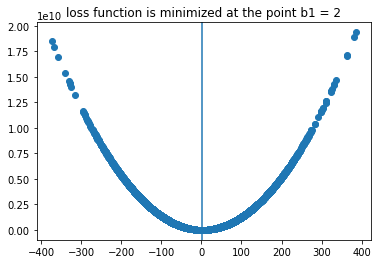

In [222]:
plt.scatter(b_1_list, loss_list)
plt.axvline(2) #수직선을 그려주는 함수
plt.title("loss function is minimized at the point b1 = 2") #b1이 2일때 이 비용함수가 최소화되는 것을 확인 가능

In [223]:
b_1_list[np.argmin(loss_list)]

2.007980710960681

In [224]:
# 모델코드 구현
# 싸이킷런은 각종 머신러닝 패키지가 들어있는 모듈
from sklearn.linear_model import LinearRegression #선형회귀
from sklearn.model_selection import train_test_split #학습 데이터셋-검증 데이터셋 분리
from sklearn.preprocessing import PolynomialFeatures #다항회귀
from sklearn.metrics import r2_score,mean_squared_error #평가지표, loss 계산방식
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor #Decision Trees는 분류에서 더 잘 쓰이지만 regression에서도 연습가능
from sklearn.tree import export_graphviz
import graphviz 

In [225]:
df.head()

age  sex     bmi  children  smoker  region      charges
0   19    0  27.900         0       1       3  16884.92400
1   18    1  33.770         1       0       2   1725.55230
2   28    1  33.000         3       0       2   4449.46200
3   33    1  22.705         0       0       1  21984.47061
4   32    1  28.880         0       0       1   3866.85520

In [226]:
x = df.iloc[:, :-1] #charges 제외 모든 features 추출
y = df["charges"]

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 156) #학습, 검증 데이터로 나눠주는 과정

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)
#train data는 1070개, test data는 268개

(1070, 6) (1070,) (268, 6) (268,)


In [227]:
lr = LinearRegression(fit_intercept = True) #선형회귀 class, fit_intercept = True로 설정해서 b0도 포함
lr.fit(X_train, y_train) #선형회귀에 train data로 학습

LinearRegression()

In [228]:
lr.coef_ #b1~b6까지의 값을 array로 표현. coefficients : 계수 : parameters
#age, sex, bmi, children, smoker, region이 변수들이었음

array([  255.23521357,  -157.46928633,   346.66121286,   602.48556758,
       23718.80891456,  -425.02862186])

In [229]:
lr.coef_[0] #b1값에 접근하고 싶을 때

255.2352135728639

In [230]:
lr.intercept_ #절편, b0값

-12177.737854141498

In [231]:
y_train_pred = lr.predict(X_train) #생성 모델에 train dataset 넣어서 결과 확인
y_test_pred = lr.predict(X_test) #생성 모델에 test dataset 넣어서 결과 확인. 이것이 test score가 되는 것
#test score
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
print("train score : ", train_r2, " test score: ", test_r2)

train score :  0.7483484869599253  test score:  0.7585772057589387


In [232]:
lr.score(X_test, y_test) #이러한 메소드로도 test score를 구할 수 있다.

0.7585772057589387

Text(0.5, 1.0, 'Linear regression residual plot')

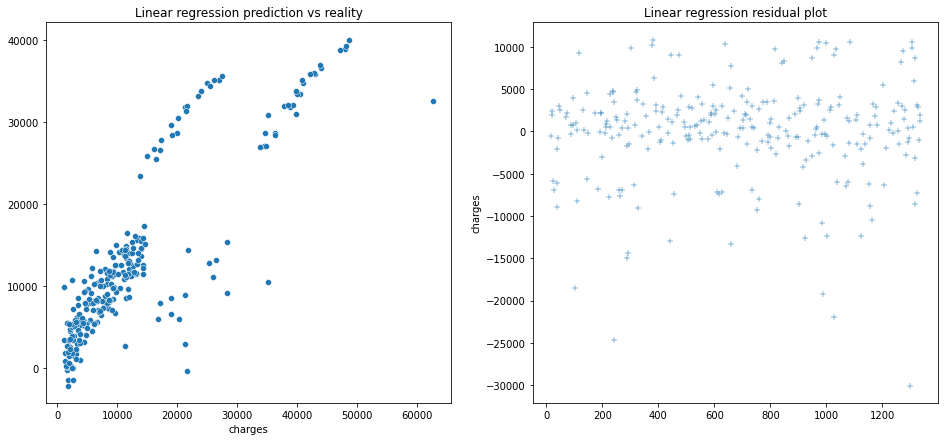

In [233]:
#결과 시각화
ax = plt.figure(figsize = (16, 7))
ax_1 = ax.add_subplot(121)
sns.scatterplot(x = y_test, y = y_test_pred, ax = ax_1)
ax_1.set_title("Linear regression prediction vs reality") #prediction, reality를 각각 x와 y에 두고 그린 것. y=x에 가까이 그려져 있으면 좋음 
ax_2 = ax.add_subplot(122)
resid = y_test_pred - y_test #잔차 계산
sns.scatterplot(x = y_test.index, y = resid, marker = "+", ax = ax_2)
ax_2.set_title("Linear regression residual plot") #잔차 플롯. (예측값-실제값)을 그린 것이므로 0에 가까이 분포해 있으면 좋음

In [234]:
#다항회귀 적용
quad = PolynomialFeatures(degree = 2) #2차 다항회귀/변수의 개수 6개
X_quad = quad.fit_transform(x)
X_quad.shape #6개였던 column이 28개로 확장 -> 6H2=28

(1338, 28)

In [235]:
X_train, X_test, y_train, y_test = train_test_split(X_quad, y, random_state = 156)

plr = LinearRegression()
plr.fit(X_train, y_train) 

y_train_pred = plr.predict(X_train) 
y_test_pred = plr.predict(X_test) 

print("2차 다항회귀 r2 score: ", plr.score(X_test, y_test)) 

2차 다항회귀 r2 score:  0.832434784864428


Text(0.5, 1.0, 'Quadratic regression residual plot')

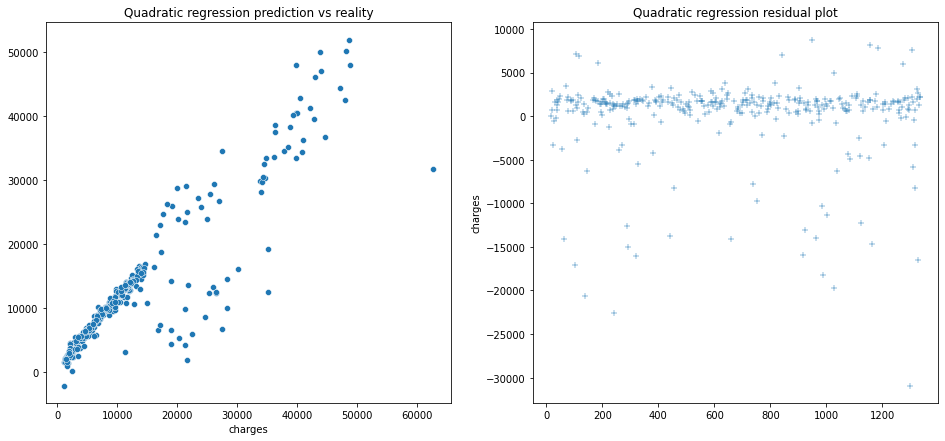

In [236]:
#결과 시각화
ax = plt.figure(figsize = (16, 7))
ax_1 = ax.add_subplot(121)
sns.scatterplot(x = y_test, y = y_test_pred, ax = ax_1)
ax_1.set_title("Quadratic regression prediction vs reality")
ax_2 = ax.add_subplot(122) 
resid = y_test_pred - y_test #잔차계산
sns.scatterplot(x = y_test.index, y = resid, marker = "+", ax = ax_2) 
ax_2.set_title("Quadratic regression residual plot")

In [237]:
#3차 다항회귀
cube = PolynomialFeatures(degree = 3)
X_cube = cube.fit_transform(x)
X_cube.shape

(1338, 84)

In [238]:
X_train, X_test, y_train, y_test = train_test_split(X_cube, y, random_state = 156)
cb = LinearRegression() 
cb.fit(X_train, y_train)

y_train_pred = cb.predict(X_train) 
y_test_pred = cb.predict(X_test )
print("3차 다항회귀 r2 score: ", cb.score(X_test, y_test ))

#overfitting

3차 다항회귀 r2 score:  0.8266017419267235


Text(0.5, 1.0, 'Cubic regression residual plot')

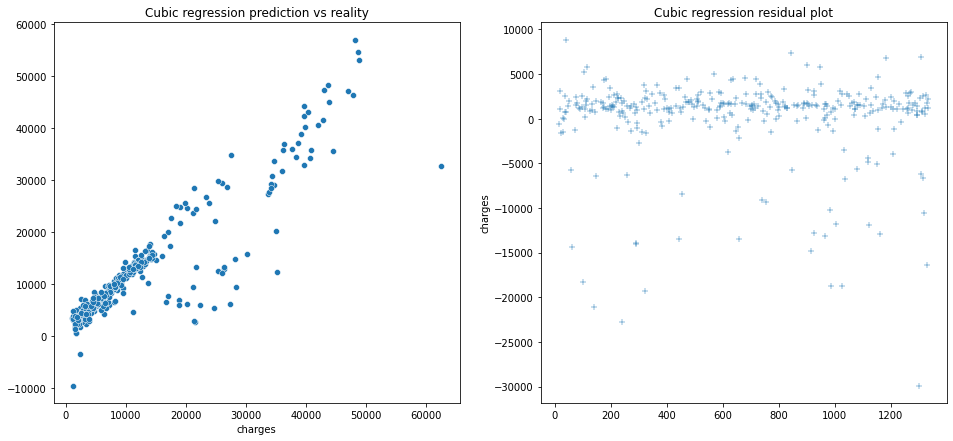

In [239]:
#결과 시각화
ax = plt.figure(figsize = (16, 7))
ax_1 = ax.add_subplot(121)
sns.scatterplot(x = y_test, y = y_test_pred, ax = ax_1)
ax_1.set_title("Cubic regression prediction vs reality")
ax_2 = ax.add_subplot(122)
resid = y_test_pred - y_test 
sns.scatterplot(x = y_test.index, y = resid, marker = "+", ax = ax_2)
ax_2.set_title("Cubic regression residual plot")

In [240]:
tree_reg = tree.DecisionTreeRegressor(max_depth = 3) #max_depth는 스무 고개의 질문의 개수를 의미, 규칙 노드의 최대 개수를 결정
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 156) #학습, 검증 데이터로 나눠주는 과정
tree_reg.fit(X_train, y_train)
y_test_pred = tree_reg.predict(X_test) 
print("DecisionTree score: ", tree_reg.score(X_test, y_test))

DecisionTree score:  0.8720639173862283


In [241]:
df.head()

age  sex     bmi  children  smoker  region      charges
0   19    0  27.900         0       1       3  16884.92400
1   18    1  33.770         1       0       2   1725.55230
2   28    1  33.000         3       0       2   4449.46200
3   33    1  22.705         0       0       1  21984.47061
4   32    1  28.880         0       0       1   3866.85520

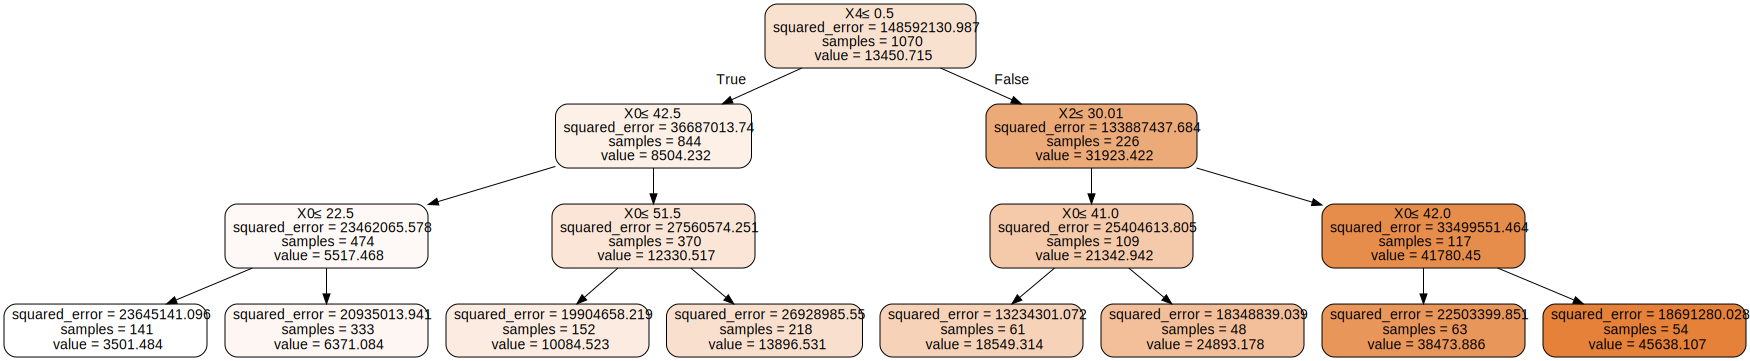

In [242]:
dot_data4 = tree.export_graphviz(tree_reg, out_file = None, filled = True, rounded = True, special_characters = True, impurity = True) #decision tree 시각화
graph4 = graphviz.Source(dot_data4)
graph4

#1. 주어진 데이터 X와 y, b1와 b0을 바탕으로 다음의 과제를 수행하라.




 













> 1-(1). X와 y의 관계를 나타내는 단순 선형회귀식을 제안하라(절편 있음).

In [293]:
import numpy as np

In [294]:
X = np.array([np.random.normal(3, 1) for i in range(1000)]) 
y = np.array(4000*X-210)
#y는 X의 정확히 4000배에 210을 빼게끔 정의

In [295]:
# y = 4000x - 210

> 1-(2). OLS 형식의 비용함수 코드를 제작하라.



In [296]:
def loss(b_1, b_0):
  return sum((y - (b_1*X + b_0))**2)

> 1-(3). 아래 코드에 이어 b_1_array, b_0_array를 바탕으로 loss를 계산하여 100000개의 비용 값으로 이루어진 array "loss_array"를 만들어라. (단, 코드 실행에 약 2분이 소요되며, 비용 array의 변수명은 "loss_array"여야 함)

In [297]:
b_1_array = np.array([np.random.normal(4000, 100) for i in range(100000)])
b_0_array = np.array([np.random.normal(100, 100) for i in range(100000)])

In [298]:
loss_array = np.array([ loss(b_1, b_0) for b_1, b_0 in zip(b_1_array, b_0_array) ])
# for b_1 in b_1_array for b_0 in b_0_array라고 하면 시간이 너무 오래걸림, 위에 방법은 시간이 너무 짧게 걸림 무엇이 문제인가?



> 1-(4). 아래의 코드를 실행해 loss 값을 시각화하고 최적의 b1과 b0을 제안하라. (코드 실행에 약 30초 소요)



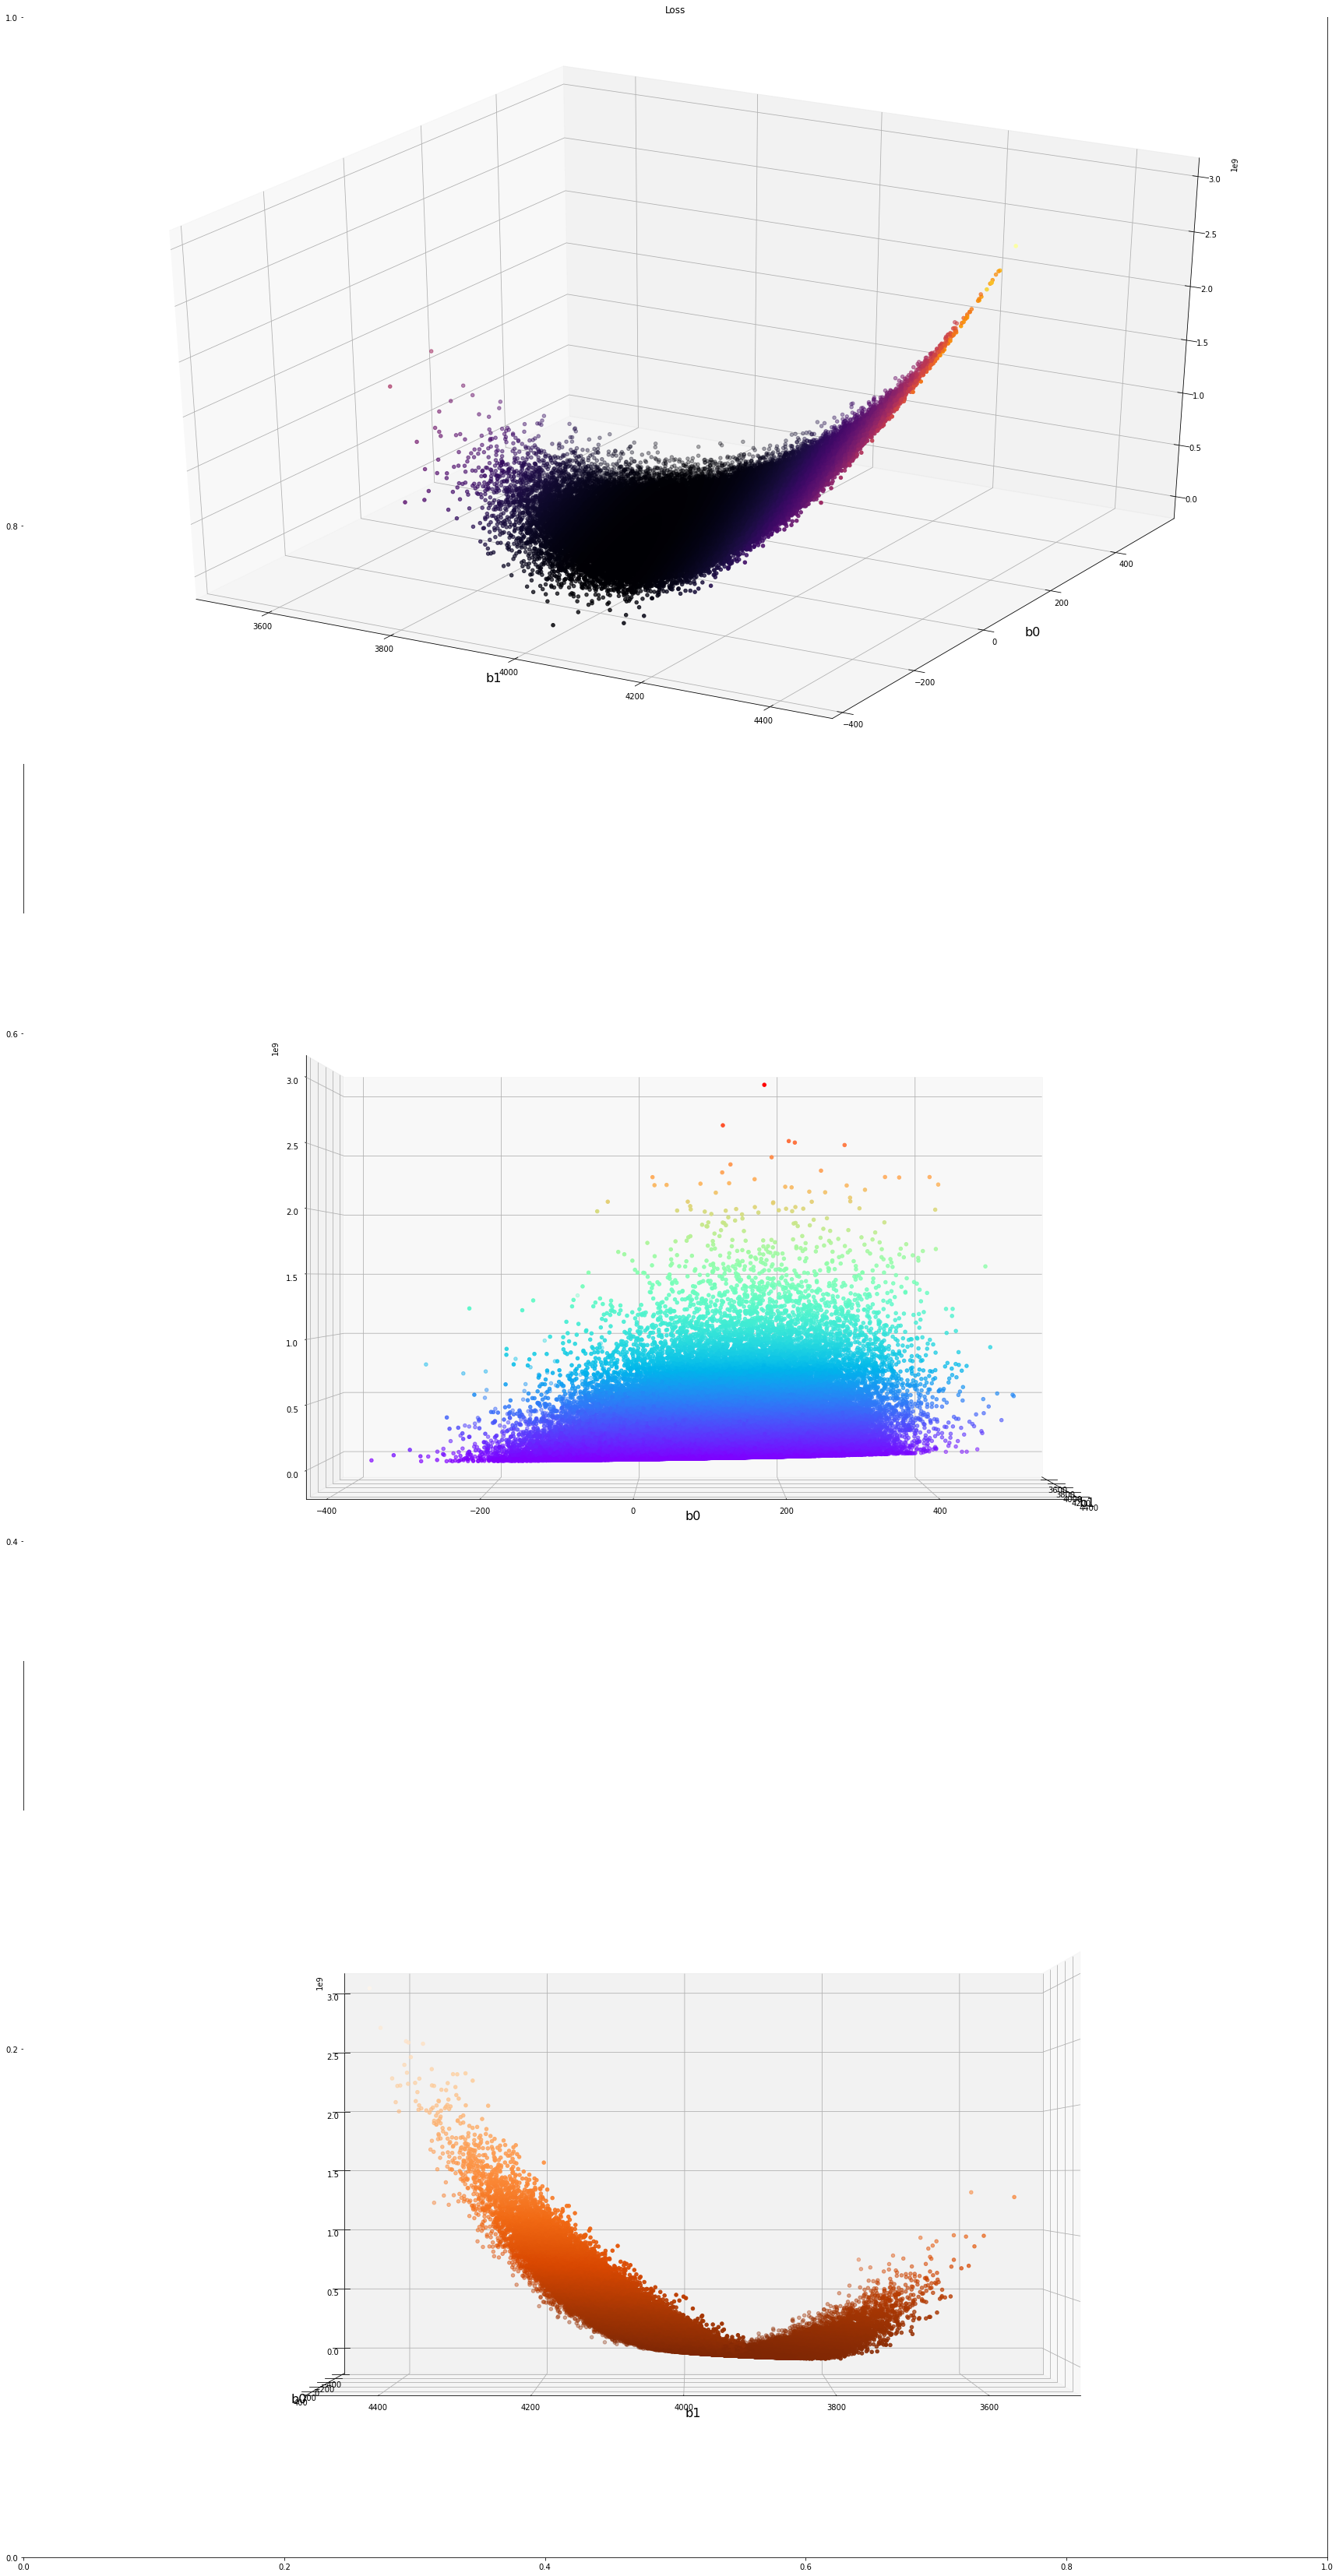

In [299]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (30, 60))
plt.title("Loss")
ax = fig.add_subplot(311, projection='3d')
ax.scatter(b_1_array, b_0_array, loss_array, c = loss_array, cmap = "inferno")
ax.set_xlabel("b1", fontsize = 16)
ax.set_ylabel("b0", fontsize = 16)
ax = fig.add_subplot(312, projection = "3d")
ax.scatter(b_1_array, b_0_array, loss_array, c = loss_array, cmap = "rainbow")
ax.set_xlabel("b1", fontsize = 16)
ax.set_ylabel("b0", fontsize = 16)
ax.view_init(elev=0, azim=0)
ax = fig.add_subplot(313, projection = "3d")
ax.scatter(b_1_array, b_0_array, loss_array, c = loss_array, cmap = "Oranges_r")
ax.set_xlabel("b1", fontsize = 16)
ax.set_ylabel("b0", fontsize = 16)
ax.view_init(elev=0, azim=90)
plt.show()

In [300]:
b_1_array[np.argmin(loss_array)]

4003.451548399656

In [301]:
b_0_array[np.argmin(loss_array)]

-217.92052779641494

In [302]:
# b1: 4003.451548399656, b0: -217.92052779641494



> 1-(5). 최적의 b1과 b0의 지점에서 비용함수 곡선의 기울기는 어떠한지 해석하라.



In [304]:
#편미분
def b1_partial_derivate(b_1, b_0):
  return sum(-2*X*(y-b_1*X-b_0))

In [305]:
def b0_partial_derivate(b_1, b_0):
  return sum(-2*(y-b_1*X-b_0))

In [306]:
b1_partial_derivate(b_1_array[np.argmin(loss_array)], b_0_array[np.argmin(loss_array)])

20728.372649424186

In [307]:
b0_partial_derivate(b_1_array[np.argmin(loss_array)], b_0_array[np.argmin(loss_array)])

4708.8570360385875

In [ ]:
#b1에 대한 기울기 : 20728.372649424186
#b0에 대한 기울기 : 4708.8570360385875



> 1-(6). (추가 과제) 위에서 작성한 OLS 식을 b0에 대해 편미분해 비용함수가 최소가 되게끔 하는 b0의 추정량은 아래와 같다. 이를 증명하라.
$$  b_{0} = \bar{y}- b_{1}\bar{x}  $$

 


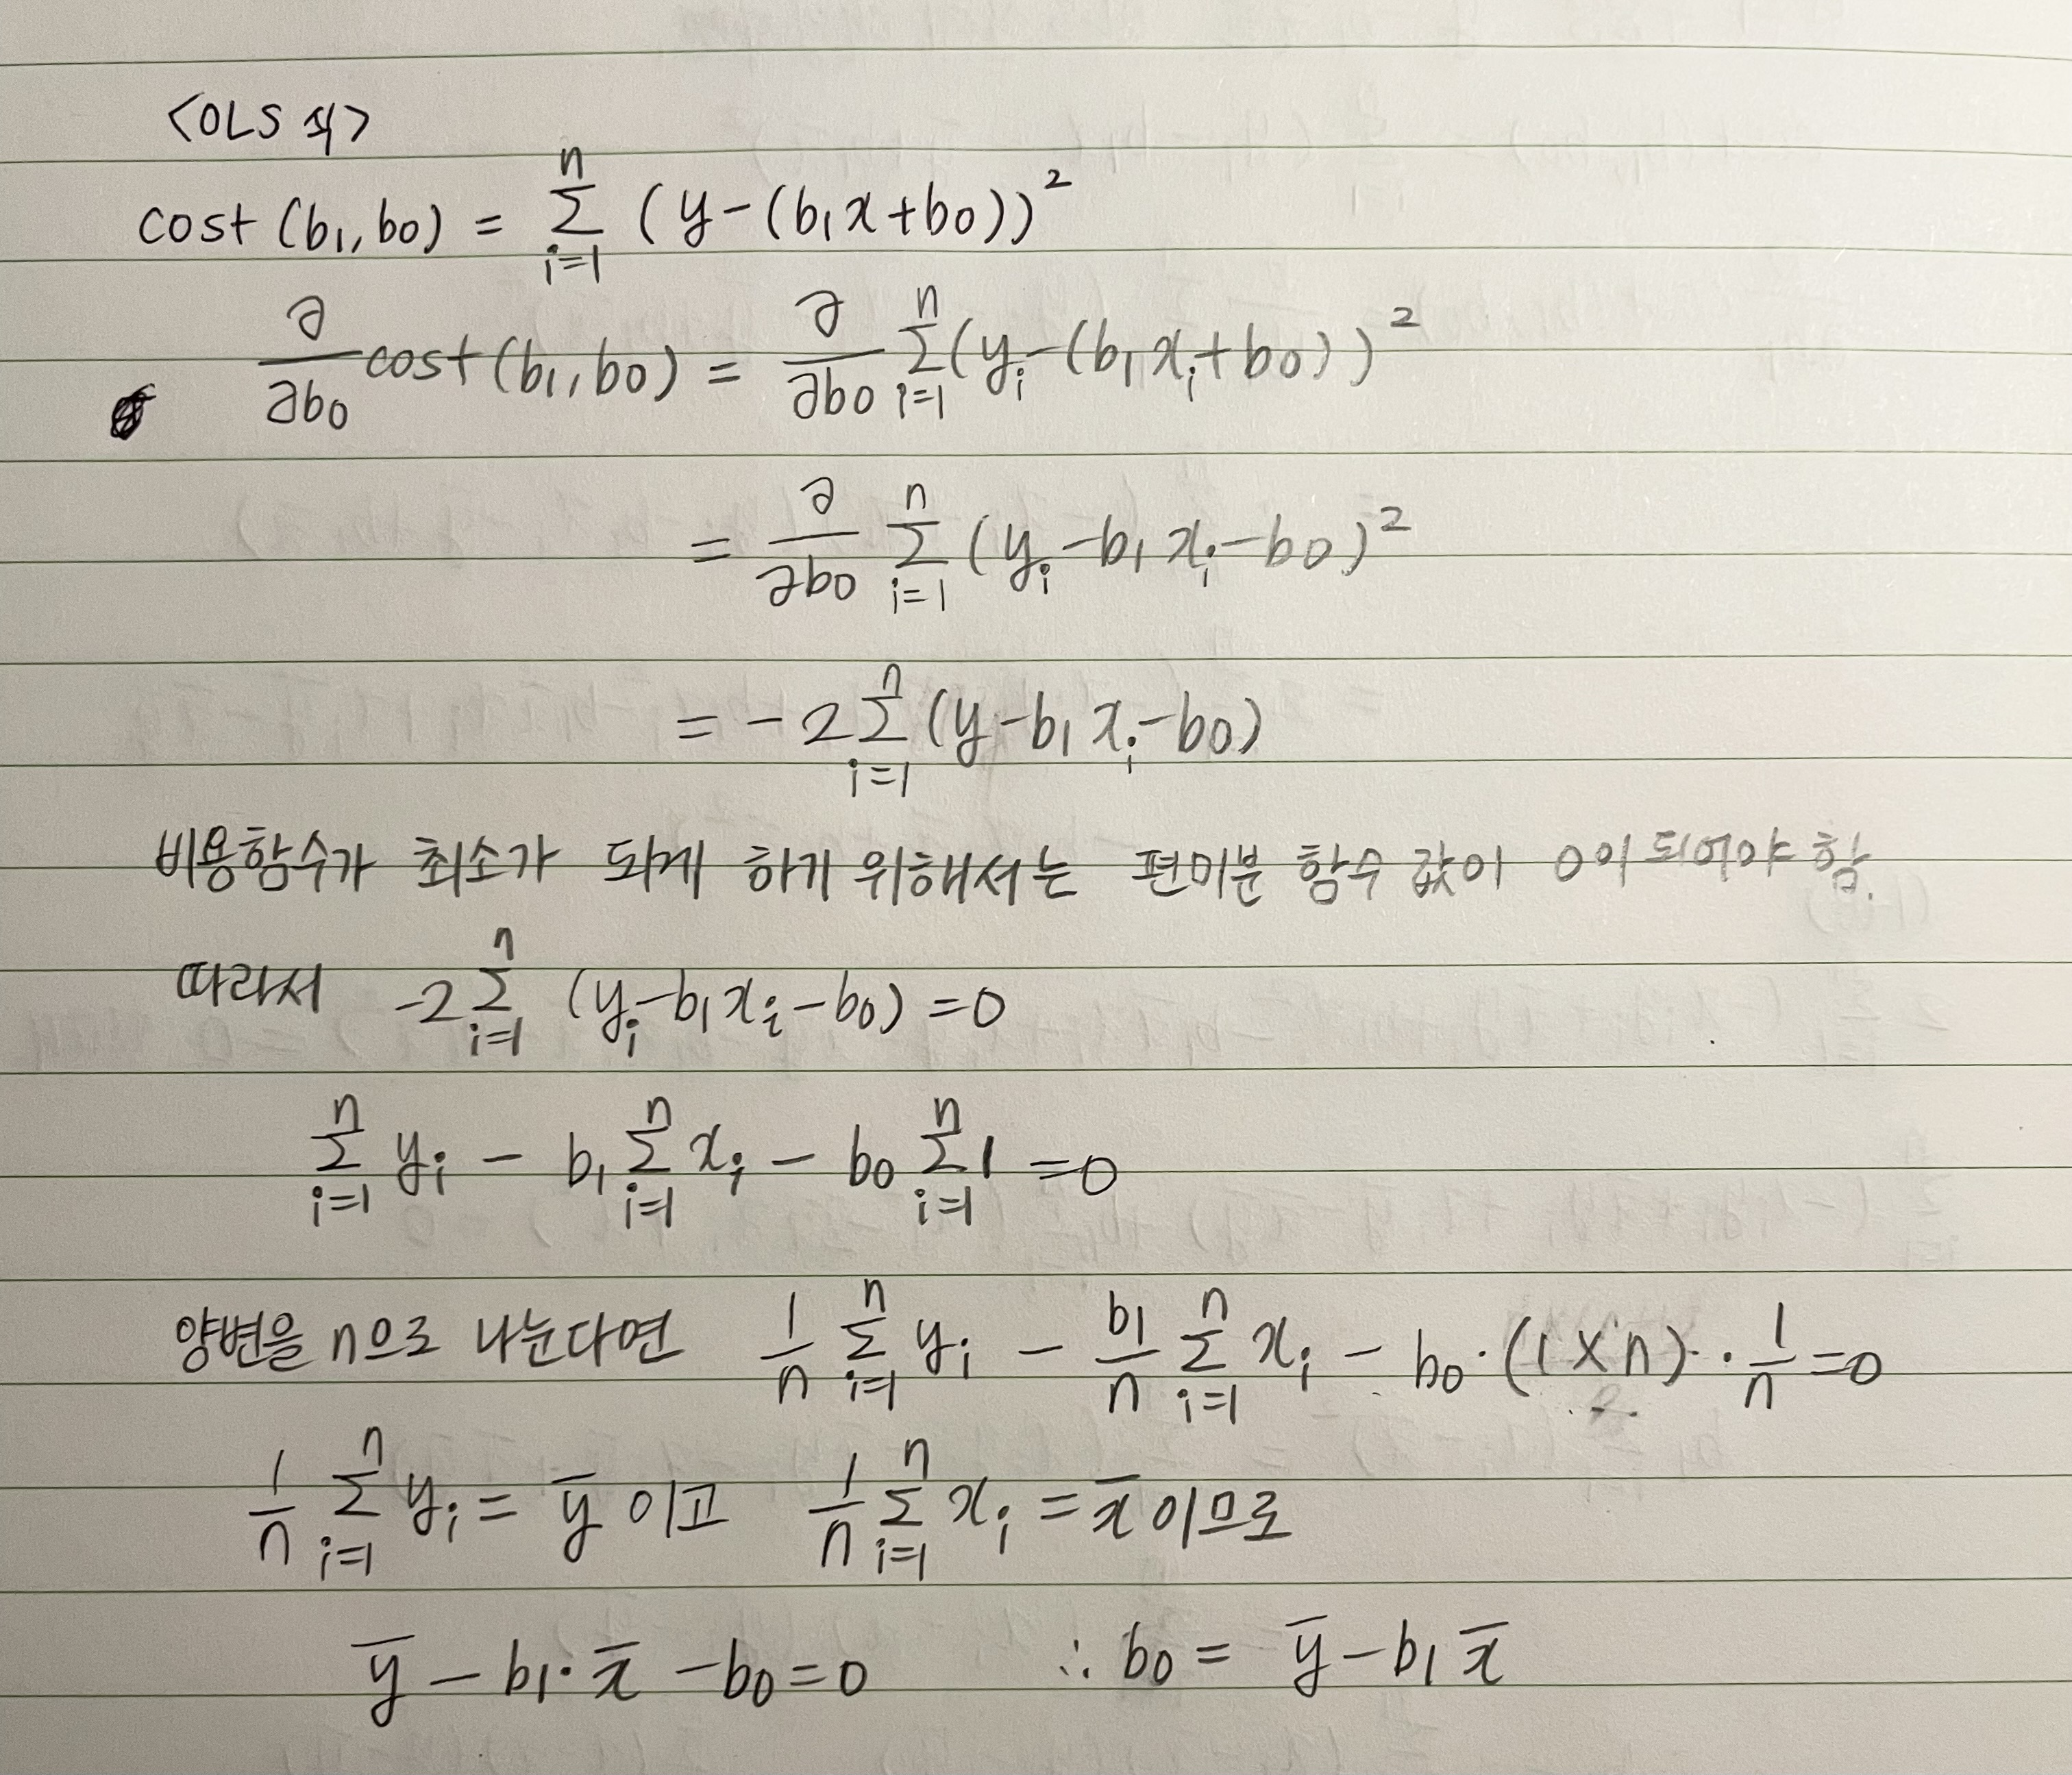



> 1-(7). (추가 과제) b0의 추정량을 OLS 식에 대입해 b1에 대해 편미분하라. 


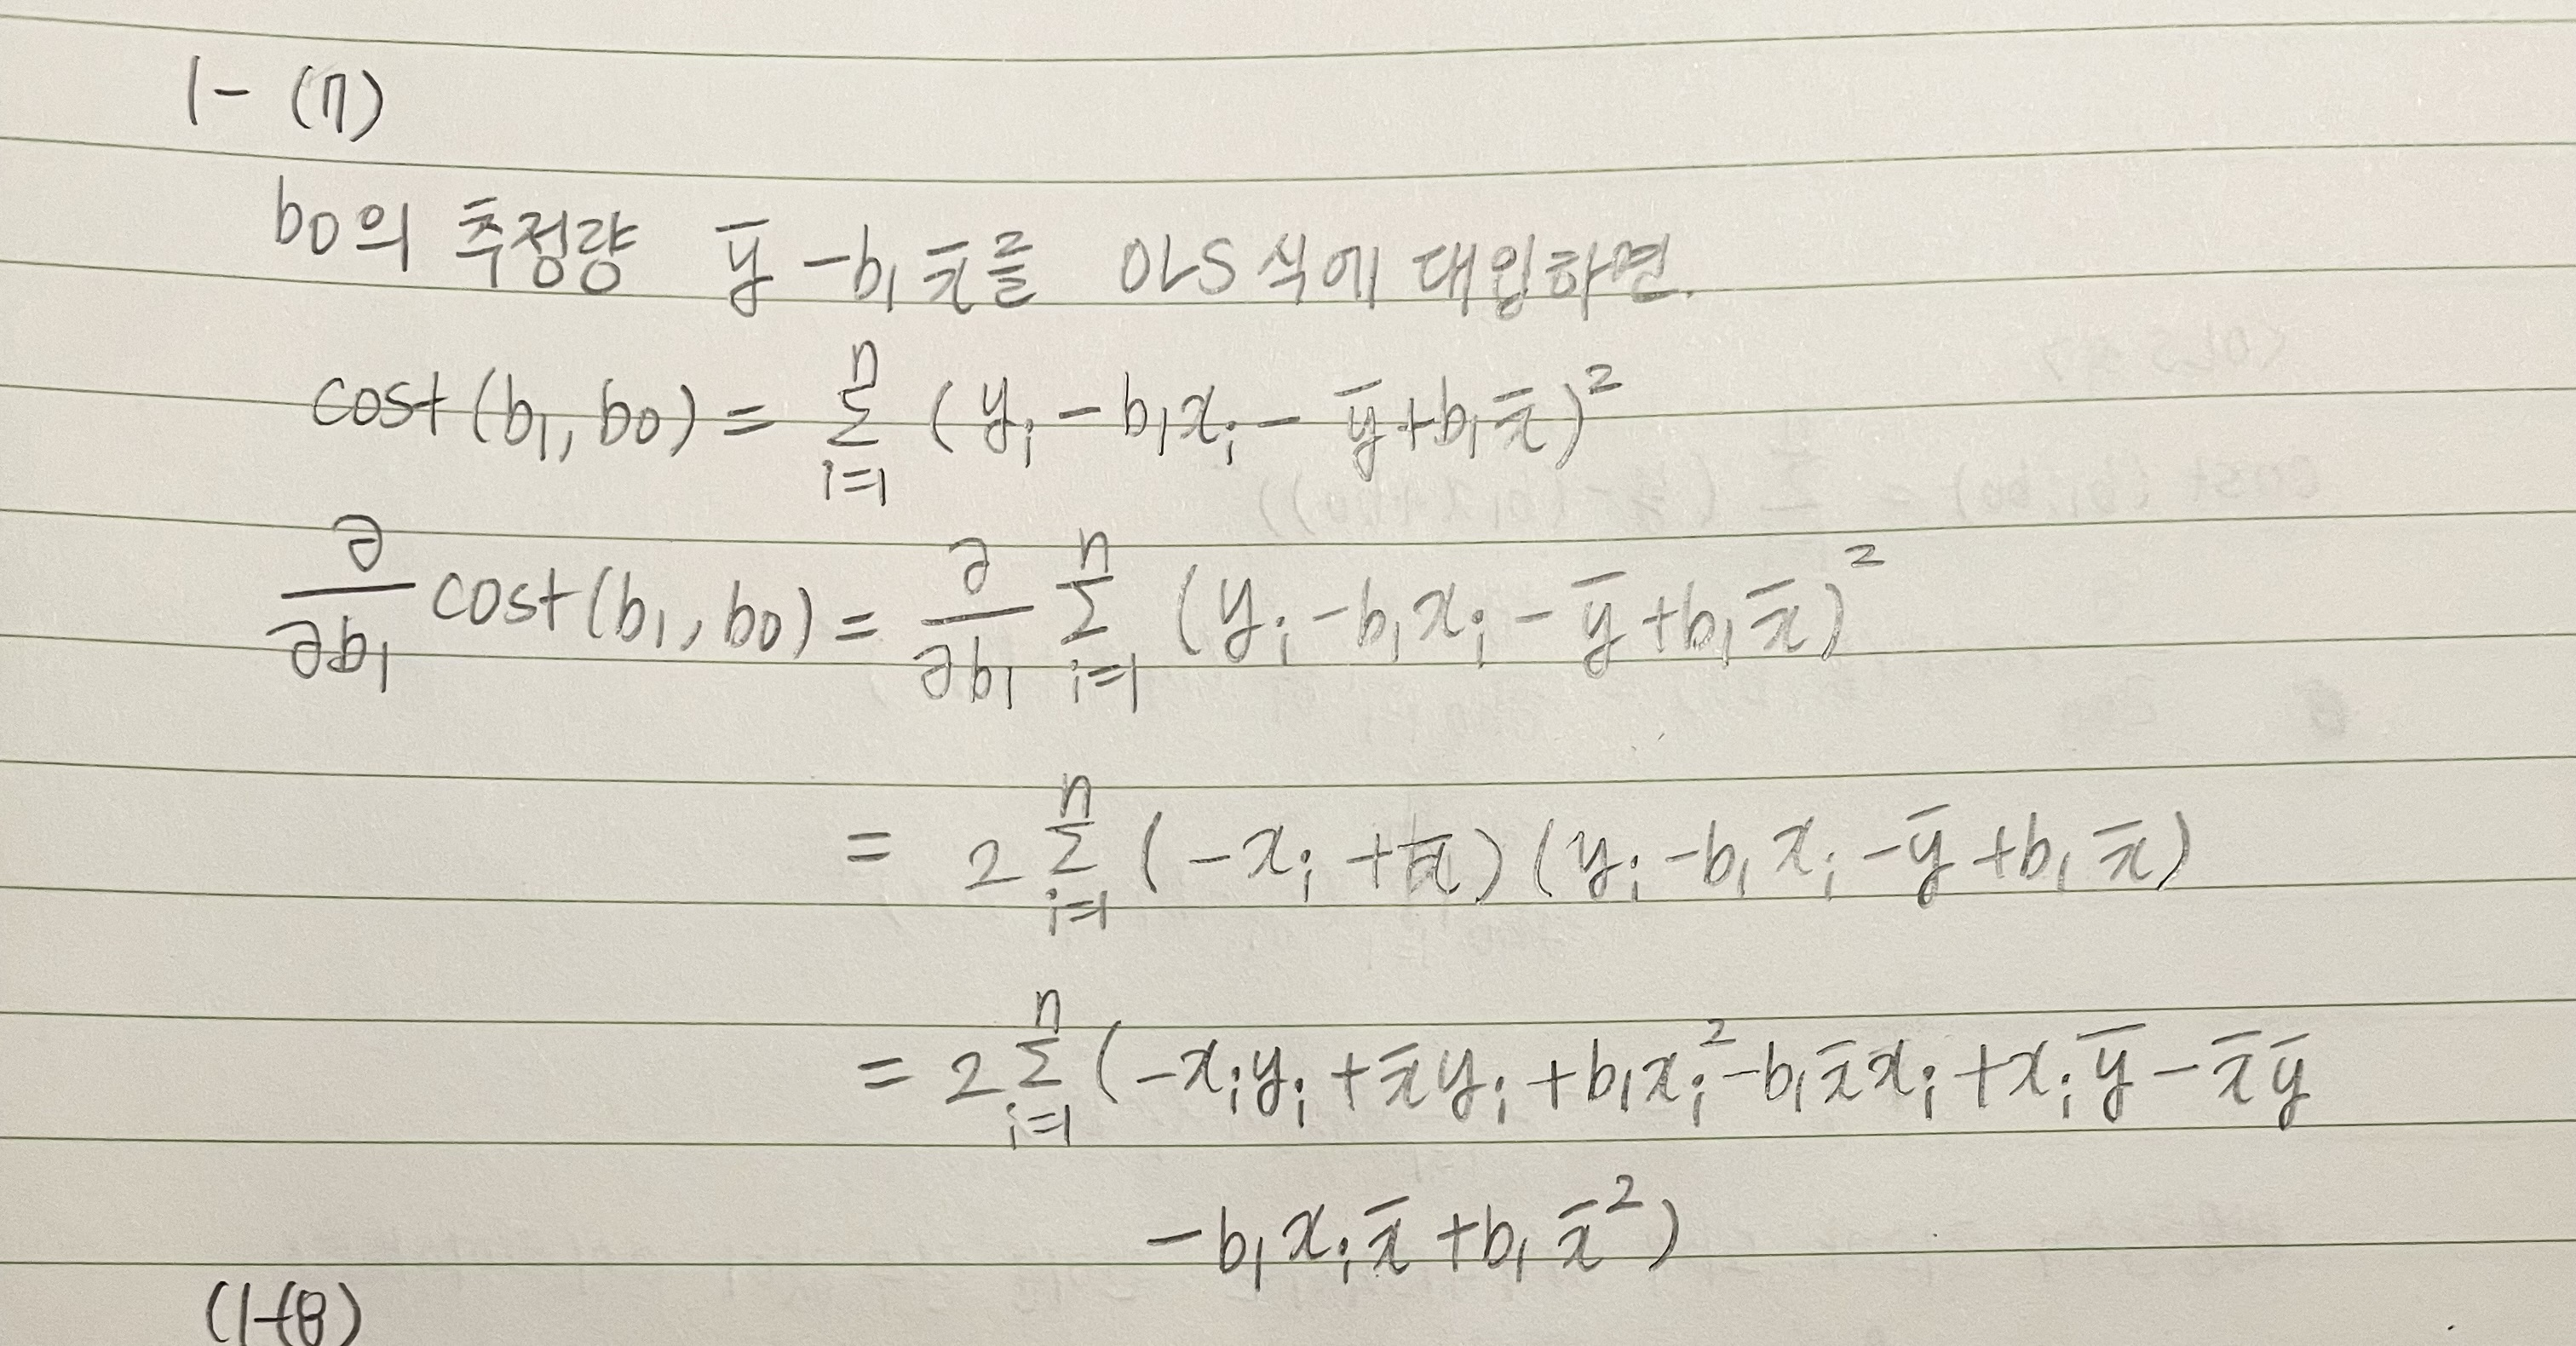



> 1-(8). (추가 과제) 1-(7)의 편미분방정식이 0이 되도록 하는 b1의 추정량은 아래와 같다. 이를 증명하라.

$$ {\sum{(x-\bar{x})(y-\bar{y})} \over{\sum{(x-\bar{x}})^2}} = b_{1} $$



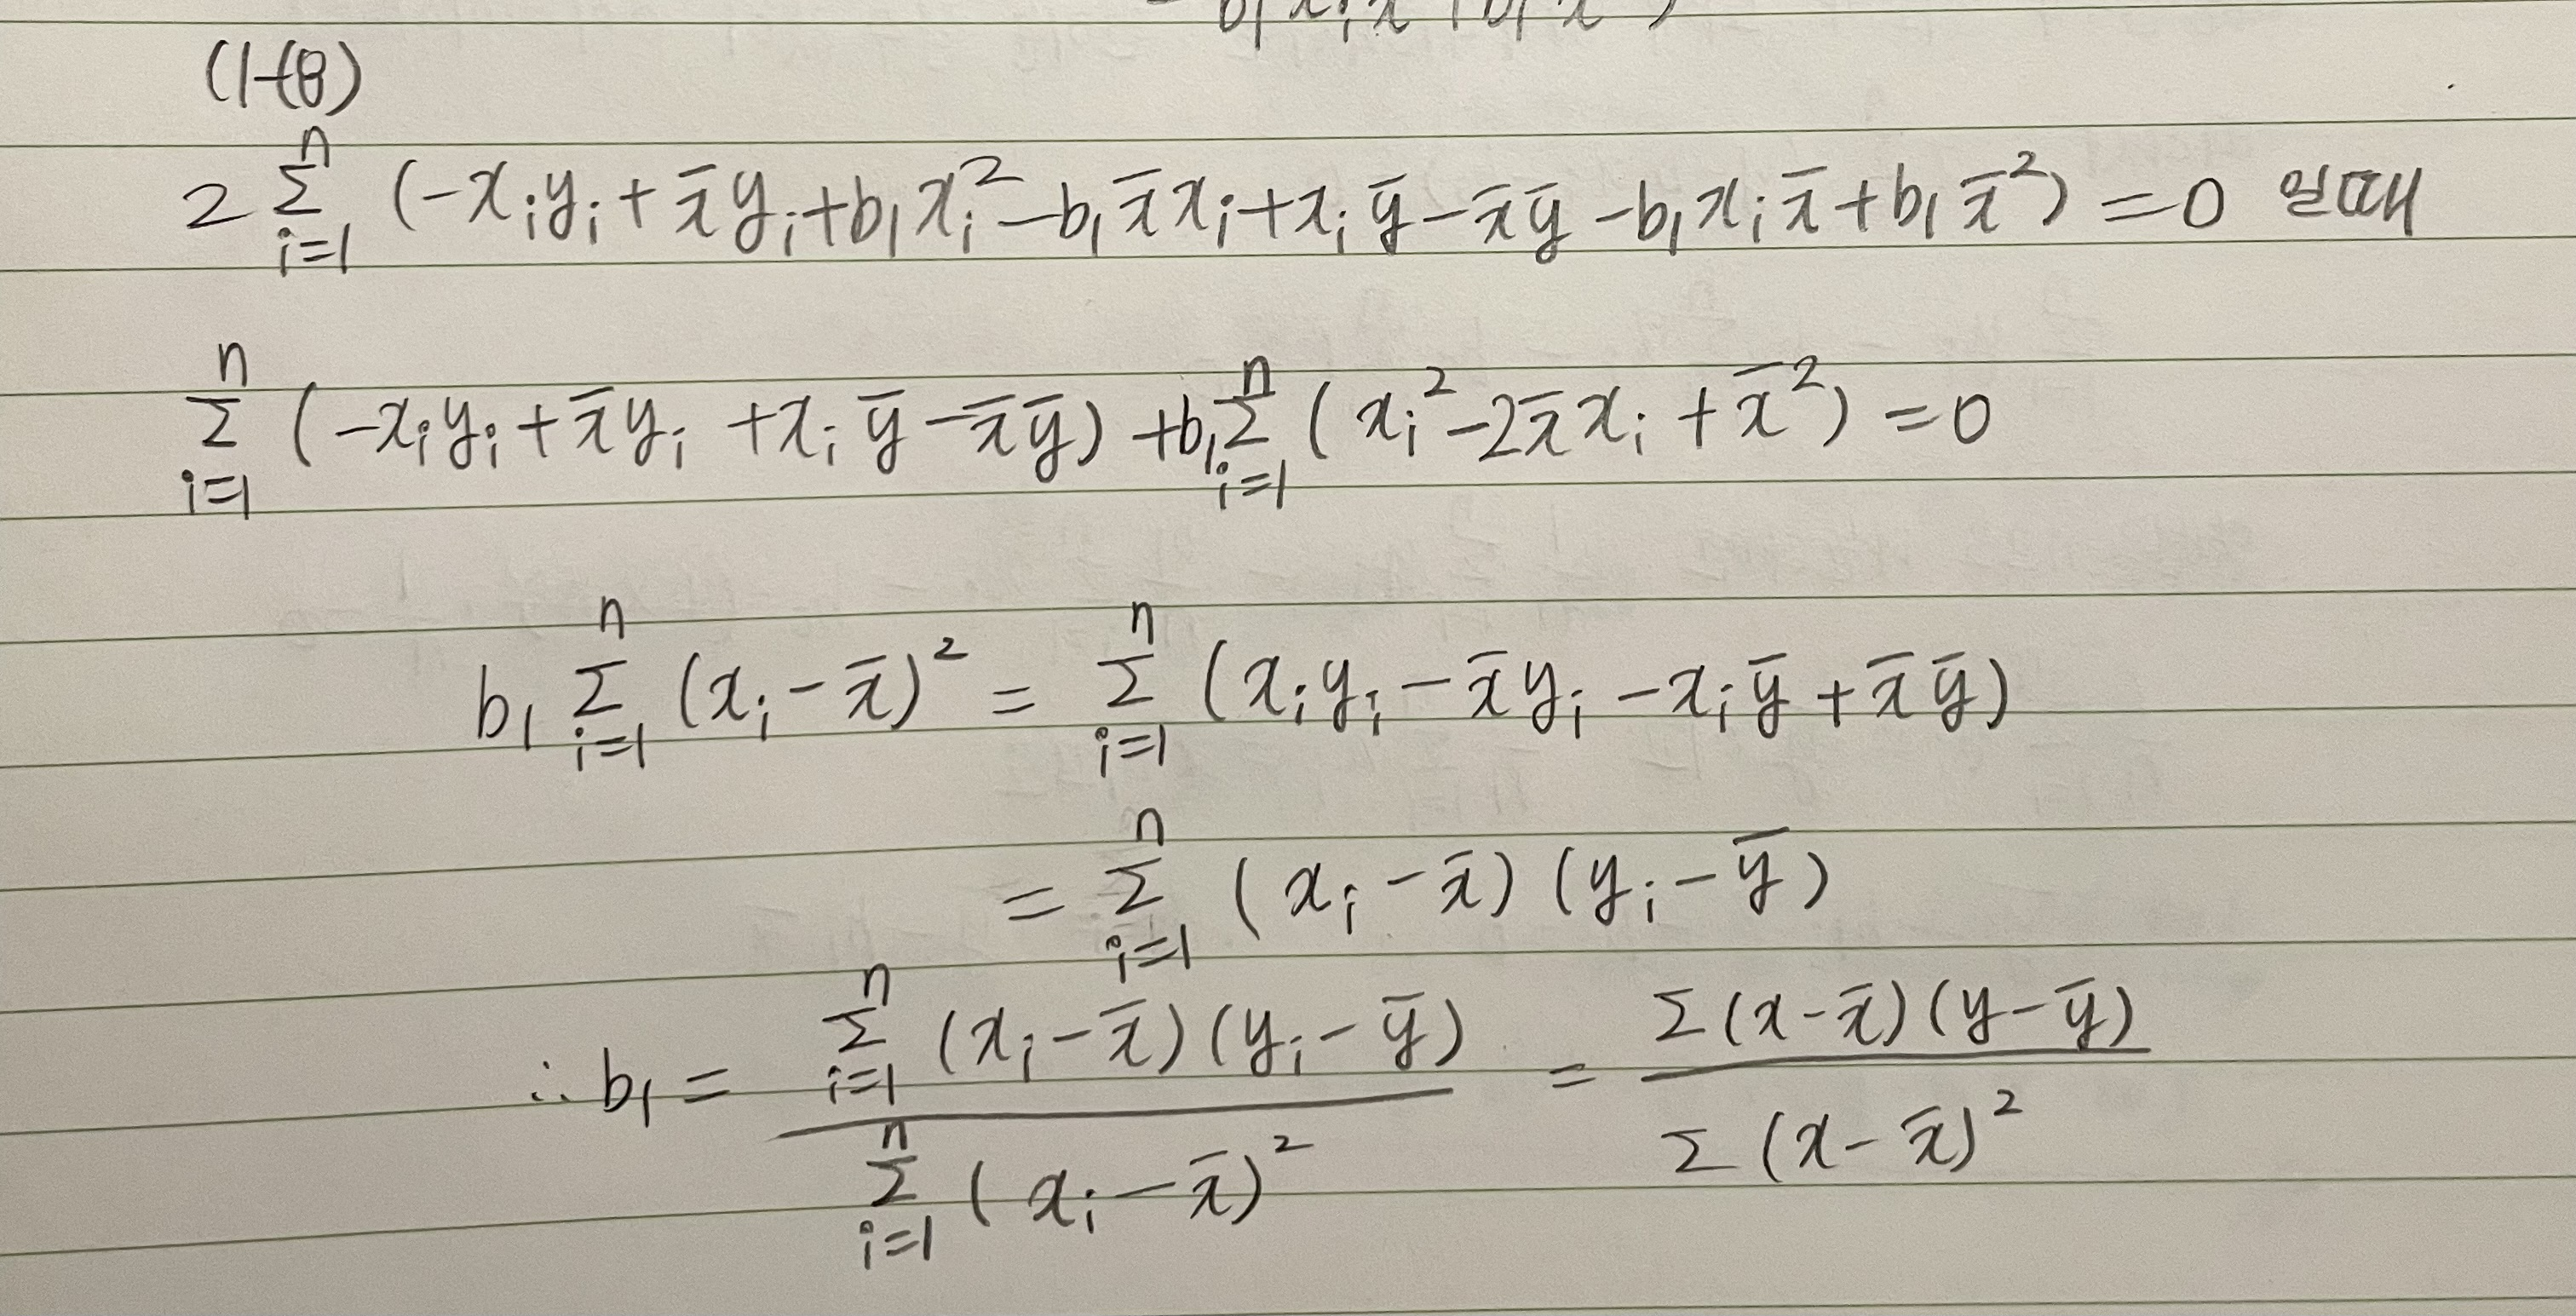



> 1-(9). (추가 과제) 파이썬을 활용해 실제로 b0과 b1을 구해보고, 이 값들이 1-(4)에서 제안한 최적의 b0, b1값과 부합하는지 확인하라.



In [308]:
def real_b1():
  return sum((X-np.mean(X))*(y-np.mean(y)))/sum((X-np.mean(X))**2)

In [312]:
b1 = real_b1()
b1

4000.0000000000014

In [313]:
def real_b0(b_1):
  return np.mean(y)-b_1*np.mean(X)

In [315]:
b0 = real_b0(b1)
b0

-210.00000000000364

In [ ]:
#추가문제로 구한 방법을 사용했을 때 나온 b0, b1 값들은 1-(4)에서 제안한 b0, b1 값과 비슷하지만 완전 똑같지는 않았다.

#2. 주어진 데이터 kc_house_data.csv를 바탕으로 다음의 과제를 수행하라.



> 2-(1). https://www.notion.so/deepdaiv/4efbe5caadfc44758b978a594fcdf486#bdc0a05dec2340bfa399693dee6e0cbe 에서 kc_house_data.csv 데이터를 불러오고 info와 describe, shape 등 메소드를 바탕으로 데이터를 개괄하라.



In [254]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import random

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score,mean_squared_error
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz
import graphviz 

In [255]:
from google.colab import drive 
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [256]:
df = pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/kc_house_data.csv")

In [257]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21611 non-null  float64
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [258]:
df.describe()

id         price      bedrooms     bathrooms   sqft_living  \
count  2.161300e+04  2.161300e+04  21613.000000  21613.000000  21613.000000   
mean   4.580302e+09  5.400881e+05      3.370842      2.114757   2079.899736   
std    2.876566e+09  3.671272e+05      0.930062      0.770163    918.440897   
min    1.000102e+06  7.500000e+04      0.000000      0.000000    290.000000   
25%    2.123049e+09  3.219500e+05      3.000000      1.750000   1427.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot        floors    waterfront          view     condition  \
count  2.161300e+04  21613.000000  21613.000000  21613.000000  21613.000000   
mean   1.510697e+04      1.494309      0.007542      0.234303      3.409430   
std    4.142051e+04      0.539989      0.086517      0.766318      0.650743   
min    5.200000e+02      1.000000      0.000000      0.000000      1.000000   
25%    5.040000e+03      1.000000      0.000000      0.000000      3.000000   
50%    7.618000e+03      1.500000      0.000000      0.000000      3.000000   
75%    1.068800e+04      2.000000      0.000000      0.000000      4.000000   
max    1.651359e+06      3.500000      1.000000      4.000000      5.000000   

              grade    sqft_above  sqft_basement      yr_built  yr_renovated  \
count  21613.000000  21611.000000   21613.000000  21613.000000  21613.000000   
mean       7.656873   1788.396095     291.509045   1971.005136     84.402258   
std        1.175459    828.128162     442.575043     29.373411    401.679240   
min        1.000000    290.000000       0.000000   1900.000000      0.000000   
25%        7.000000   1190.000000       0.000000   1951.000000      0.000000   
50%        7.000000   1560.000000       0.000000   1975.000000      0.000000   
75%        8.000000   2210.000000     560.000000   1997.000000      0.000000   
max       13.000000   9410.000000    4820.000000   2015.000000   2015.000000   

            zipcode           lat          long  sqft_living15     sqft_lot15  
count  21613.000000  21613.000000  21613.000000   21613.000000   21613.000000  
mean   98077.939805     47.560053   -122.213896    1986.552492   12768.455652  
std       53.505026      0.138564      0.140828     685.391304   27304.179631  
min    98001.000000     47.155900   -122.519000     399.000000     651.000000  
25%    98033.000000     47.471000   -122.328000    1490.000000    5100.000000  
50%    98065.000000     47.571800   -122.230000    1840.000000    7620.000000  
75%    98118.000000     47.678000   -122.125000    2360.000000   10083.000000  
max    98199.000000     47.777600   -121.315000    6210.000000  871200.000000

In [259]:
df.shape

(21613, 21)

In [260]:
# 21613행 21열

In [261]:
df["sqft_above"].sort_values()

19452     290.0
15381     370.0
860       380.0
18379     384.0
21332     390.0
          ...  
7252     8570.0
9254     8860.0
12777    9410.0
10          NaN
17          NaN
Name: sqft_above, Length: 21613, dtype: float64



> 2-(2). 본 데이터셋은 타 feature들을 바탕으로 집값(price)를 예측해 볼 수 있는 데이터셋이다. 결측치가 있는지 확인하고, 있다면 적절하게 처리하라.



In [262]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       2
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [263]:
#sqft_above 열에 결측값 2개, 제외하고 나머지는 없음.
#결측값 처리 방법: 결측값에 대해 평균값으로 처리 --> 값이 딱 2개만 비어있으므로...

In [264]:
df2 = df.fillna(df.mean())

In [265]:
df2.head()

id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7      1180.0              0   
1      7242     2.0           0     0  ...      7      2170.0            400   
2     10000     1.0           0     0  ...      6       770.0              0   
3      5000     1.0           0     0  ...      7      1050.0            910   
4      8080     1.0           0     0  ...      8      1680.0              0   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      1955             0    98178  47.5112 -122.257           1340   
1      1951          1991    98125  47.7210 -122.319           1690   
2      1933             0    98028  47.7379 -122.233           2720   
3      1965             0    98136  47.5208 -122.393           1360   
4      1987             0    98074  47.6168 -122.045           1800   

   sqft_lot15  
0        5650  
1        7639  
2        8062  
3        5000  
4        7503  

[5 rows x 21 columns]



> 2-(3). Domain Knowledge를 활용하거나 실험을 통해 데이터에 대해 각기 다른 인사이트를 담은 시각화를 두 가지 수행하라.



In [266]:
corr_df = df2.corr()

In [267]:
corr_df["price"].sort_values(ascending = True)

zipcode         -0.053203
id              -0.016762
long             0.021626
condition        0.036362
yr_built         0.054012
sqft_lot15       0.082447
sqft_lot         0.089661
yr_renovated     0.126434
floors           0.256794
waterfront       0.266369
lat              0.307003
bedrooms         0.308350
sqft_basement    0.323816
view             0.397293
bathrooms        0.525138
sqft_living15    0.585379
sqft_above       0.605565
grade            0.667434
sqft_living      0.702035
price            1.000000
Name: price, dtype: float64

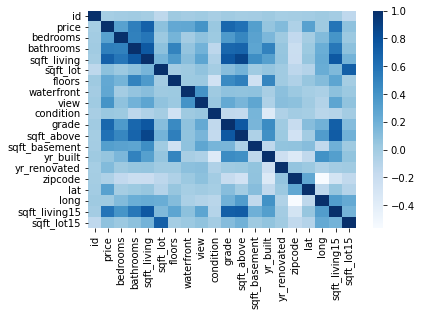

In [268]:
import seaborn as sns
sns.heatmap(corr_df, cmap="Blues")

In [269]:
# price와 관련된 지표들을 corr()로 살펴보니 sqft_living, grade 순으로 연관성이 높다.
#sqft_living과 price 사이의 관계에 대해서 살펴보자.
#1. sqft_living (거실 면적?인 것 같음)이 클수록 가격이 높아진다.

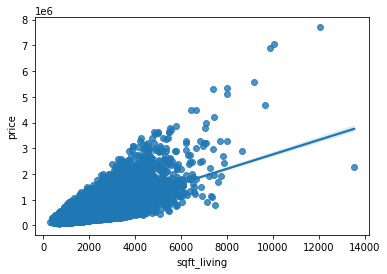

In [270]:
import matplotlib.pyplot as plt 
sns.regplot(x='sqft_living', y='price', data = df2)
plt.show()
#산점도를 그리긴 했는데,,, 고르게 분포되어있는게 아니라 price 낮은 쪽에서 living 사이즈가 엄청 다양하게 분포해있음.. 유의미한 상관관계는 없는 것 같다.

In [271]:
#price-grade사이 관계 알아보기

In [272]:
df2["grade"] #grade는 이산형 변수이다.

#그렇다면 이산형 변수와 연속형 변수를 동시에 나타내기 위한 방법은??

0        7
1        7
2        6
3        7
4        8
        ..
21608    8
21609    8
21610    7
21611    8
21612    7
Name: grade, Length: 21613, dtype: int64

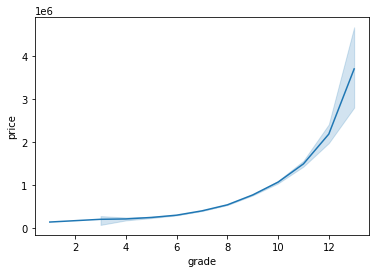

In [273]:
sns.lineplot(x='grade', y='price', data = df2)
plt.show()

In [274]:
#grade가 증가할수록 가격이 기하급수적으로 증가함을 알 수 있다.


> 2-(4). 집값 예측에 필요하지 않은 열이 있다면 처리하고 그 근거를 제시하라.



In [275]:
#corr가 낮은 열이 있다면 처리해보자.

#zipcode 열 제거
#이유: 상관관계가 작다 / 지역에 따라 집값이 달라진다 라는 가설을 세우려고 해도 우편번호만 보고 지역을 나눌 수는 없기 때문에 제거해도 될 것

#id 열 제거
#이유: 그냥 집에 관련된 고유 번호이므로 집값 예측과는 상관이 없음

#date열 제거
#이유: 해당날짜에 이 가격으로 거래되었다는 정보는 에측에 사용될 필요가 없으므로 삭제 

In [276]:
df3 = df2.drop(["zipcode", "id", "date"], axis = 1)
df3

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0      221900.0         3       1.00         1180      5650     1.0   
1      538000.0         3       2.25         2570      7242     2.0   
2      180000.0         2       1.00          770     10000     1.0   
3      604000.0         4       3.00         1960      5000     1.0   
4      510000.0         3       2.00         1680      8080     1.0   
...         ...       ...        ...          ...       ...     ...   
21608  360000.0         3       2.50         1530      1131     3.0   
21609  400000.0         4       2.50         2310      5813     2.0   
21610  402101.0         2       0.75         1020      1350     2.0   
21611  400000.0         3       2.50         1600      2388     2.0   
21612  325000.0         2       0.75         1020      1076     2.0   

       waterfront  view  condition  grade  sqft_above  sqft_basement  \
0               0     0          3      7      1180.0              0   
1               0     0          3      7      2170.0            400   
2               0     0          3      6       770.0              0   
3               0     0          5      7      1050.0            910   
4               0     0          3      8      1680.0              0   
...           ...   ...        ...    ...         ...            ...   
21608           0     0          3      8      1530.0              0   
21609           0     0          3      8      2310.0              0   
21610           0     0          3      7      1020.0              0   
21611           0     0          3      8      1600.0              0   
21612           0     0          3      7      1020.0              0   

       yr_built  yr_renovated      lat     long  sqft_living15  sqft_lot15  
0          1955             0  47.5112 -122.257           1340        5650  
1          1951          1991  47.7210 -122.319           1690        7639  
2          1933             0  47.7379 -122.233           2720        8062  
3          1965             0  47.5208 -122.393           1360        5000  
4          1987             0  47.6168 -122.045           1800        7503  
...         ...           ...      ...      ...            ...         ...  
21608      2009             0  47.6993 -122.346           1530        1509  
21609      2014             0  47.5107 -122.362           1830        7200  
21610      2009             0  47.5944 -122.299           1020        2007  
21611      2004             0  47.5345 -122.069           1410        1287  
21612      2008             0  47.5941 -122.299           1020        1357  

[21613 rows x 18 columns]



> 2-(5). price 컬럼은 y로, 그 외 컬럼은 X로 상정한 뒤 train_test_split을 활용해 학습 데이터 셋과 검증 데이터 셋으로 분리하라.



In [277]:
X = df3.iloc[:, 1:]
y = df3["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123) #학습, 검증 데이터셋 분리



> 2-(6). LinearRegression을 활용해 모델을 적합한 뒤 해당 모델의 성능을 MSE와 R^2의 차원에서 평가하라.



In [278]:
lr = LinearRegression(fit_intercept = True)
lr.fit(X_train, y_train) 

LinearRegression()

In [279]:
#MSE, R^2 차원 평가

In [280]:
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred) 
MSE_score = mean_squared_error(y_test, y_test_pred)
print("train score: ", train_r2, " test score: ", test_r2, "MSE: ", MSE_score)

train score:  0.6916592401836072  test score:  0.7089012386712008 MSE:  41109191298.33569




> 2-(7). 2-(6) 에서 만든 LinearRegression의 coef(계수)를 불러와 각 feature가 집값에 미치는 영향에 대해 해석하라.



In [281]:
lr.coef_

array([-3.20999851e+04,  4.09457380e+04,  1.26037160e+02,  1.70293396e-01,
       -3.12339606e+02,  6.07850347e+05,  4.95136486e+04,  3.02363887e+04,
        1.00557320e+05,  4.59563313e+01,  1.41311513e+01, -2.46531186e+03,
        2.09580031e+01,  5.56809777e+05, -1.16044980e+05,  2.96972743e+01,
       -4.12714404e-01])

In [282]:
#array 순서: bedrooms   	bathrooms	    sqft_living	    sqft_lot
#            floors	      waterfront	  view	          condition	
#            grade	      sqft_above	  sqft_basement  	yr_built	
#            yr_renovated	lat	          long	          sqft_living15	
#            sqft_lot15
index = X.columns
index

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

([<matplotlib.axis.XTick at 0x7fdf658a76a0>,
 [Text(0, 0, 'bedrooms'),
  Text(0, 0, 'bathrooms'),
  Text(0, 0, 'sqft_living'),
  Text(0, 0, 'sqft_lot'),
  Text(0, 0, 'floors'),
  Text(0, 0, 'waterfront'),
  Text(0, 0, 'view'),
  Text(0, 0, 'condition'),
  Text(0, 0, 'grade'),
  Text(0, 0, 'sqft_above'),
  Text(0, 0, 'sqft_basement'),
  Text(0, 0, 'yr_built'),
  Text(0, 0, 'yr_renovated'),
  Text(0, 0, 'lat'),
  Text(0, 0, 'long'),
  Text(0, 0, 'sqft_living15'),
  Text(0, 0, 'sqft_lot15')])

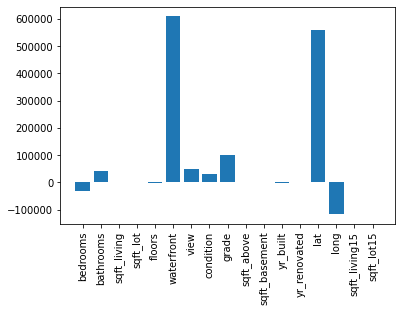

In [283]:
x = np.arange(17)
plt.bar(x, lr.coef_)
plt.xticks(x, index, rotation=90)

In [284]:
#다른 요소들은 미치는 영향이 미미한데, lat/waterfront가 압도적으로 집값에 미치는 영향이 크다
#grade가 다음으로 영향이 크다. long도 마찬가지이나 음(-)의 영향을 미친다
#vathrooms, view, condition, bedrooms도 영향이 크다.



> 2-(8). PolynomialRegression을 활용해 모델을 적합한 뒤 해당 모델의 성능을 MSE와 R^2의 차원에서 평가하라.



In [285]:
#2차 다항회귀
quad = PolynomialFeatures(degree = 2)
X_quad = quad.fit_transform(X)
X_quad.shape

(21613, 171)

In [286]:
X_train, X_test, y_train, y_test = train_test_split(X_quad, y, test_size = 0.2, random_state = 123)

plr = LinearRegression()
plr.fit(X_train,y_train)

y_train_pred = plr.predict(X_train)
y_test_pred = plr.predict(X_test)

train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred) 
MSE_score = mean_squared_error(y_test, y_test_pred)
print("train score: ", train_r2, " test score: ", test_r2, "MSE: ", MSE_score)

train score:  0.8127284841405928  test score:  0.8140050056336432 MSE:  26266356370.039925




> 2-(9). DecisionTree를 활용해 모델을 적합한 뒤 해당 모델의 성능을 MSE와 R^2의 차원에서 평가하라.



In [291]:
tree_reg = tree.DecisionTreeRegressor(max_depth = 3)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)
tree_reg.fit(X_train, y_train)
y_test_pred = tree_reg.predict(X_test)
MSE_score = mean_squared_error(y_test, y_test_pred)
print("DecisionTree r2 score: ", tree_reg.score(X_test, y_test), " MSE: ", MSE_score)

DecisionTree r2 score:  0.6378474924220782  MSE:  51143456073.92274




> 2-(10). 2-(9) 의 결과로 생성된 모델의 tree를 시각화하라.



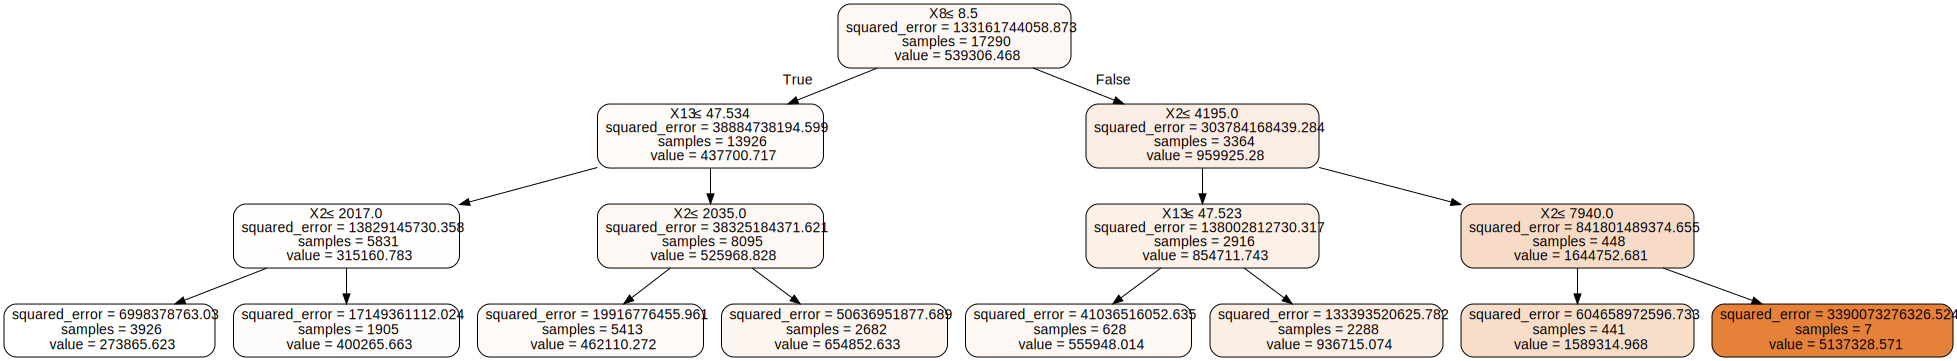

In [292]:
dot_data4 = tree.export_graphviz(tree_reg, out_file=None, filled=True, rounded=True, special_characters=True, impurity = True)
graph4 = graphviz.Source(dot_data4) 
graph4